
<h1><center>Super Store Sales - Analysis</center></h1>
**Project by - _Archit Singh_, _Shubham Sharma_**<br>


The data taken for this analysis and modelling is from https://raw.githubusercontent.com/curran/data/gh-pages/superstoreSales/superstoreSales.csv. 

The work in this notebook has been done keeping the key indicators in mind:
1. Data Exploration (Visualizations)
2. Modelling (Advanced stats)
3. Prediction

## Setups

In [4]:
import subprocess
import os
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import geopandas as gpd
import geojson
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()


#Setting working directory
# os.chdir("D:/Label Insights/files")

## Reading data

In [5]:
data=pd.read_csv("superstoresales.csv",parse_dates=['Order Date','Ship Date'])
data.head(2)

Row ID  Order ID Order Date Order Priority  Order Quantity   Sales  \
0    1914     13729 2009-01-01  Not Specified               9  872.48   
1    4031     28774 2009-01-01           High              32  180.36   

   Discount    Ship Mode  Profit  Unit Price    ...       Customer Name  \
0      0.08  Express Air -342.91       95.99    ...      Matt Collister   
1      0.10  Regular Air -111.80        5.98    ...      Jessica Myrick   

  Province   Region Customer Segment Product Category    Product Sub-Category  \
0   Quebec   Quebec      Home Office  Office Supplies  Storage & Organization   
1  Ontario  Ontario   Small Business  Office Supplies  Storage & Organization   

                                        Product Name Product Container  \
0                     Safco Industrial Wire Shelving         Large Box   
1  Perma STOR-ALL? Hanging File Box, 13 1/8"W x 1...         Small Box   

  Product Base Margin  Ship Date  
0                 NaN 2009-01-03  
1                0.68 2009-01-02  

[2 rows x 21 columns]

## Data Exploration

Since the task at hand is subjective, I have tried to pose questions to the data which can help us understand certain trends and behavior related to this store.
Before jumping to the Data Analysis part I am doing a check on null values

Data Analysis
1. Trend of profit and sales over the time period (2009-2012)
2. Shop's response to orders of different priority
3. Profit share for different provinces
4. Correlation between different variables
5. Customer Behaviour/Performance

### Checking Null values

In [6]:
print("Null values:\n\n", data.isnull().sum())

Null values:

 Row ID                   0
Order ID                 0
Order Date               0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
Profit                   0
Unit Price               0
Shipping Cost            0
Customer Name            0
Province                 0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Name             0
Product Container        0
Product Base Margin     63
Ship Date                0
dtype: int64



Since the rows with NULL values form close to 0.01% of the data therefore we can afford removing these records

In [7]:
data=data.dropna()

## Data Analysis

### Trend of sales and profit

In [8]:
#Creating tables to aggregate sales and profit
table1_profit=data.groupby('Order Date',as_index=False)[['Profit']].sum()
table1_sales=data.groupby('Order Date',as_index=False)[['Sales']].sum()

table1_profit = table1_profit.rename(columns={'Order Date': 'ODate'})
table1_sales = table1_sales.rename(columns={'Order Date': 'ODate'})

### Profit timeline

In [9]:
#Summarizing
trace = Scatter(x=list(table1_profit.ODate),
                   y=list(table1_profit.Profit))

data_profit = [trace]
layout = dict(
    title='Trend of Profit over 4 years',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data_profit, layout=layout)
iplot(fig)

### Sales timeline

In [10]:
#Summarizing
trace = Scatter(x=list(table1_sales.ODate),
                   y=list(table1_sales.Sales))

data_sales = [trace]
layout = dict(
    title='Trend of Sales over 4 years',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data_sales, layout=layout)
iplot(fig)

## Checking shop's response to orders based on their priority

In [11]:
# Time taken between order and delivery
data['lag']=(data['Ship Date']-data['Order Date']).dt.days
table2_high1=data.loc[data['Order Priority'] == 'High']
table2_critical1=data.loc[data['Order Priority'] == 'Critical']
table2_low1=data.loc[data['Order Priority'] == 'Low']
table2_medium1=data.loc[data['Order Priority'] == 'Medium']
table2_ns1=data.loc[data['Order Priority'] == 'Not Specified']

### Average delay in shipping for different types of order

In [12]:
print("High:", table2_high1['lag'].mean())
print("Critical:", table2_critical1['lag'].mean())
print("Low:", table2_low1['lag'].mean())
print("Medium:", table2_medium1['lag'].mean())
print("NS:", table2_ns1['lag'].mean())

High: 1.4136752136752138
Critical: 1.5157232704402517
Low: 4.247513165593914
Medium: 1.4707692307692308
NS: 1.4665057332528666


### Looking into the distribution of delay time

In [13]:
#Boxplot for CRITICAL priority orders

trace0 = Box(
    y=table2_critical1['lag'],
    name = 'Critical',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)

trace1 = Box(
    y=table2_high1['lag'],
    name = 'High',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )

)

trace2 = Box(
    y=table2_medium1['lag'],
    name = 'Medium',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)


trace3 = Box(
    y=table2_low1['lag'],
    name = 'Low',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)


data1 = [trace0, trace1, trace2, trace3]
iplot(data1)

The boxplots show that becuase of an outlier the mean of critical orders is shooting up to 1.5. Still if we look at median value the median value for critical orders is higher than high priority orders. 
Intuitively the Low priority orders the median and mean values are both high

## Average profit from different provinces

In [14]:
c1=data.groupby('Province',as_index=False)[['Profit']].mean()
c2=dict(zip(c1.Province,c1.Profit))

In [29]:
import folium
import json # or import geojson
with open("geo.json") as json_file:
    json_data = json.load(json_file) # geojson file

# create a plain world map centred about Canada
can_map = folium.Map([71.7556, -90.4399], zoom_start=3, tiles='Mapbox Bright')
 
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
can_map.choropleth(
    geo_data=json_data,
    data=c2,
    columns=['Province', 'Profit'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=1.5, 
    line_opacity=1.5,
    legend_name='Average Profit from different Provinces'
)
 
# display map
can_map
# can_map.save('index.png')

# from IPython.display import Image
# Image("map.png")

/anaconda3/lib/python3.6/site-packages/folium/folium.py:432: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



Showing a png file since the folium oputput is not working on windows. The code can be run to get the output

## Correlation between variables

In [16]:
corr = data.corr()

Text(0.5,1,'Correlation Heatmap')

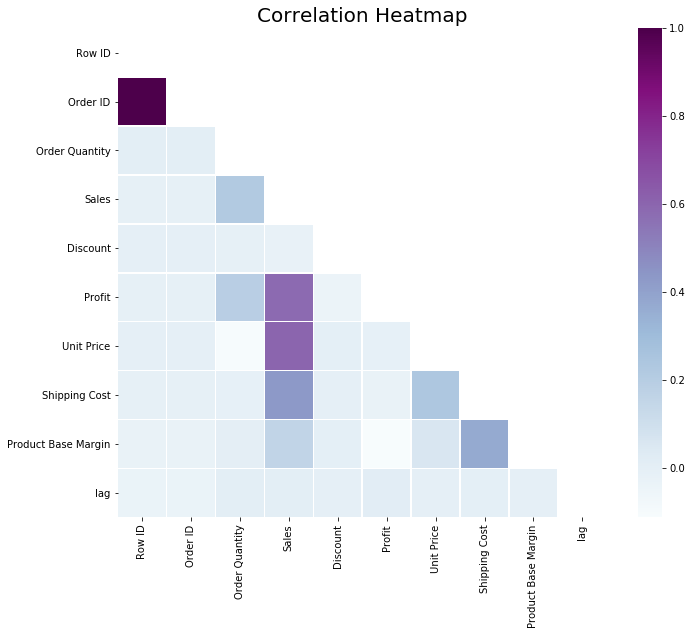

In [17]:
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sea.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=20)

Since the Sales and Profit figure have a component of 'number of units sold' in it, it won't be correct to see the correlation with these features. Therefore creating features that are independent of Units sold

In [18]:
data['Profit/unit']=data['Profit']/data['Order Quantity']
data['Sales/unit']=data['Sales']/data['Order Quantity']

### Plotting correlation matrix again

In [19]:
corr = data.corr()

Text(0.5,1,'Correlation Heatmap')

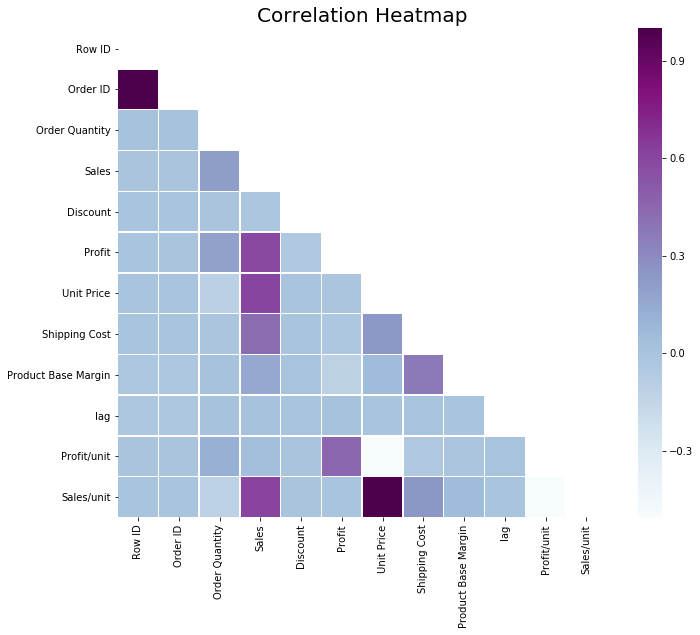

In [20]:
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sea.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=20)

There is no clear trend coming out this plot. However it can be seen that higher the Base Margin of the product more the shop spends in shipping it.

## Customer Behavior/Performance

This shows which customer was the most profitable in terms of proift and the number of times he made a purchase. The customers have been color labelled based on the consumer segment they belong to. The comparison can be done for all the 4 years.

In [30]:
customer = data.groupby(['year','Customer Name','Customer Segment'],as_index = False).agg({'Profit' : "mean",
                                                                'Row ID' : "count",
                                                                'Sales' : "mean"})
customer.columns = ['year','Customer','Segment','Profit','Freq','Sales']

KeyError: 'year'

In [23]:
import plotly.plotly as py
import cufflinks as cf

cf.set_config_file(offline=True, theme='pearl')

color1 = {'Consumer': 'red','Corporate': 'blue','Home Office': 'yellow' ,'Small Business': 'green'}

customer['color'] = customer['Segment'].map(color1)

df = customer
df2009 = df[df.year==2009]

df2009.iplot(kind='bubble', x='Freq', y='Profit', categories ="Segment",size='Sales', text='Customer', 
             xTitle='Frequency', yTitle='Profit',title="Year 2009",
             filename='cufflinks/simple-bubble-chart')


df2010 = df[df.year==2010]

df2010.iplot(kind='bubble', x='Freq', y='Profit', categories ="Segment", size='Sales', text='Customer', 
             xTitle='Frequency', yTitle='Profit',title="Year 2010",
             filename='cufflinks/simple-bubble-chart')

df2011 = df[df.year==2011]

df2011.iplot(kind='bubble', x='Freq', y='Profit', categories ="Segment", size='Sales', text='Customer', 
             xTitle='Frequency', yTitle='Profit',title="Year 2011",
             filename='cufflinks/simple-bubble-chart')

df2012 = df[df.year==2012]

df2012.iplot(kind='bubble', x='Freq', y='Profit', categories ="Segment", size='Sales', text='Customer', 
             xTitle='Frequency', yTitle='Profit',title="Year 2012",
             filename='cufflinks/simple-bubble-chart')

NameError: name 'customer' is not defined

## Modeling - Time Series Modeling

Looking at the data, there is barely any avenue to perform any type of supervised learning. The time series forecasting is performed to predict the sales in future.
- The model incorporates seasonality to predict the trend better.
- SARIMAX is used to incorporate seasonality factor
- Dicky-Fuller test is used to check stationarity of the data
- ARMA IC information is used to determine AR and MA parameters

## Time Series modeling

In [24]:
# Creating Time series data
ts=data.groupby('Order Date')[['Row ID']].count()
ts.rename(columns={'Row ID':'Sales'})
#Checking the data type of index 
ts.index

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2012-12-21', '2012-12-22', '2012-12-23', '2012-12-24',
               '2012-12-25', '2012-12-26', '2012-12-27', '2012-12-28',
               '2012-12-29', '2012-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1418, freq=None)

C:\Users\archo\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



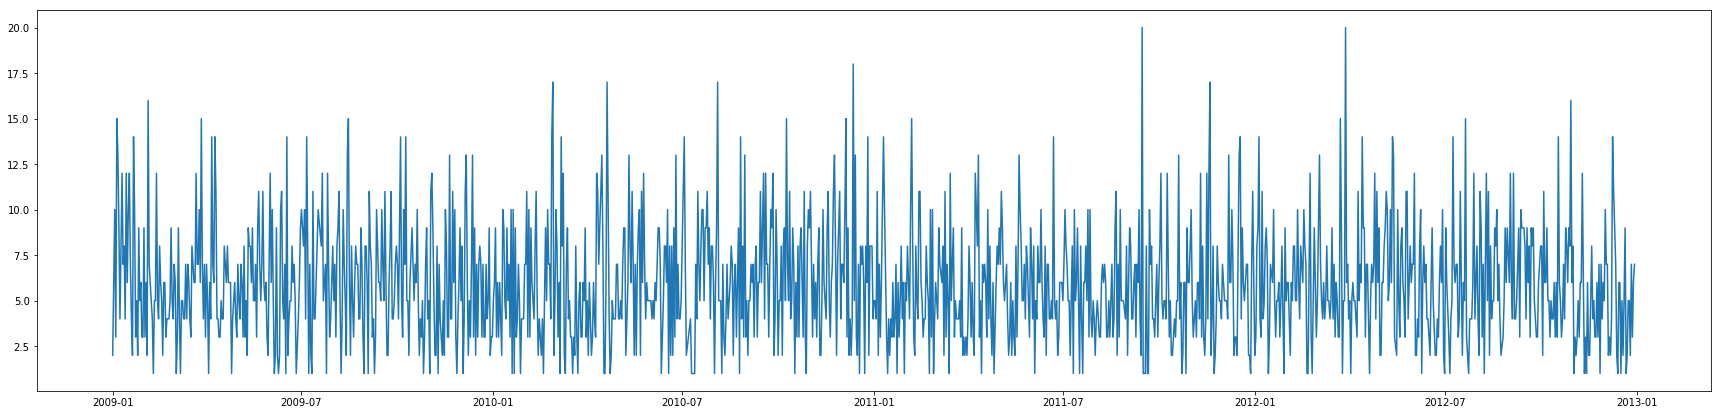

In [40]:
#Checking the stationarity of time series
fig= plt.figure(figsize=(30,7))
plt.plot(ts)

In [25]:
# Defining function to test stationarity
import pandas as pd
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
        #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:,0], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

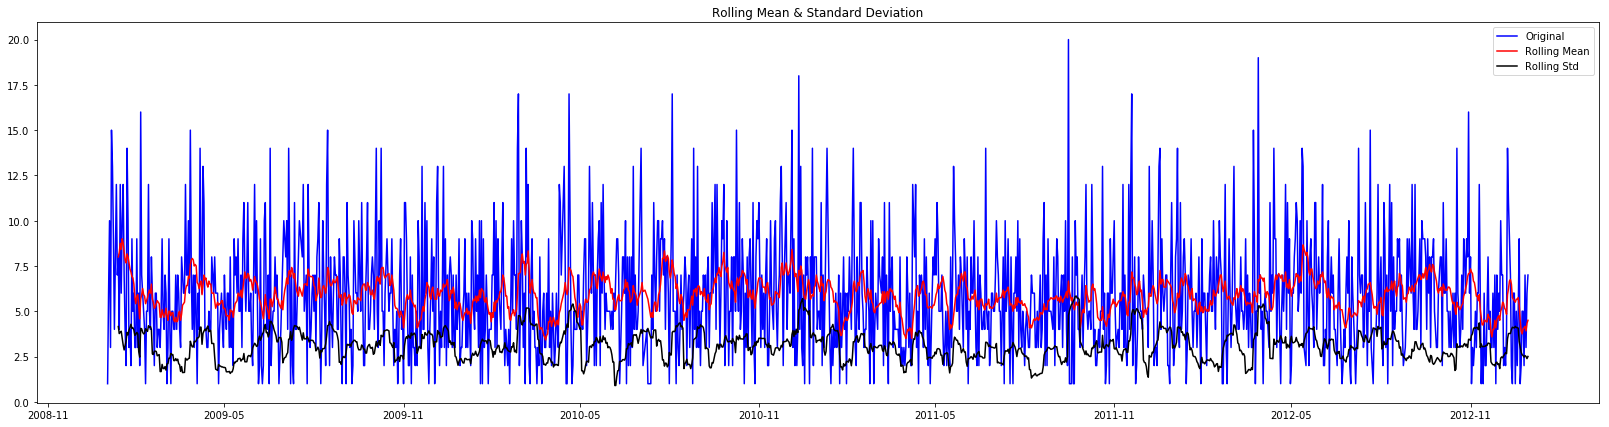

Results of Dickey-Fuller Test:
Test Statistic                  -23.004949
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    1415.000000
Critical Value (1%)              -3.434980
Critical Value (5%)              -2.863585
Critical Value (10%)             -2.567859
dtype: float64


In [26]:
#### Testing Stationarity of our time series
fig= plt.figure(figsize=(28,7))
test_stationarity(ts)

Since the test statistic is way lesser than 1% Critical value it can be safely said that the time series is stationary

Log transforming the data

ts_log=np.log(ts)

Removing trend and seasonality using Decomposotion

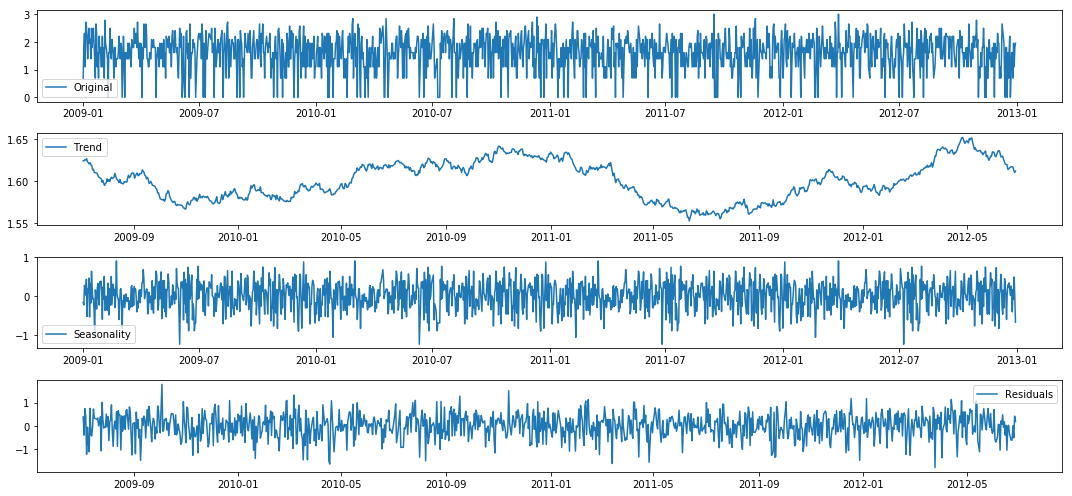

In [44]:
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log.iloc[:,0],freq=365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig= plt.figure(figsize=(15,7))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [31]:
#Checking stationarity of the decomposed data
ts_log_decompose = pd.DataFrame(residual)
ts_log_decompose.dropna(inplace=True)
# ts_log_decompose
fig= plt.figure(figsize=(28,7))
test_stationarity(ts_log_decompose)

NameError: name 'residual' is not defined

In [46]:
# Selecting AR and MA
from statsmodels.tsa.stattools import arma_order_select_ic
resDiff = arma_order_select_ic(ts_log_decompose, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date inde

C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\tsa\ba

C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date inde

ARMA(p,q) = (5, 6) is the best.


C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [47]:
#Load ARIMA model
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\archo\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Text(0.5, 1.0, 'Predicted values on log scale')

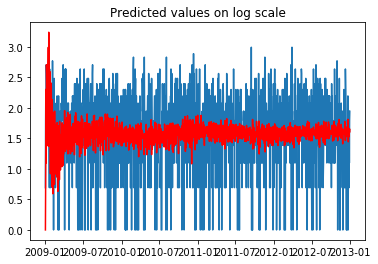

In [48]:
#ARIMA model
# Since I see a yearly trend visually I am putting seasonal order's s as 12.
model = SARIMAX(ts_log, trend='n', order=(5,1,6), seasonal_order=(5,1,6,12))
results = model.fit(disp=-1) 
fitted_values=results.fittedvalues
plt.plot(ts_log)
plt.plot(results.fittedvalues, color='red')
plt.title('Predicted values on log scale')

In [55]:
predictions_SARIMAX = pd.Series(results.fittedvalues, copy=True)
# predictions_SARIMAX.head()

Text(0.5, 1.0, 'RMSE: 3.4873')

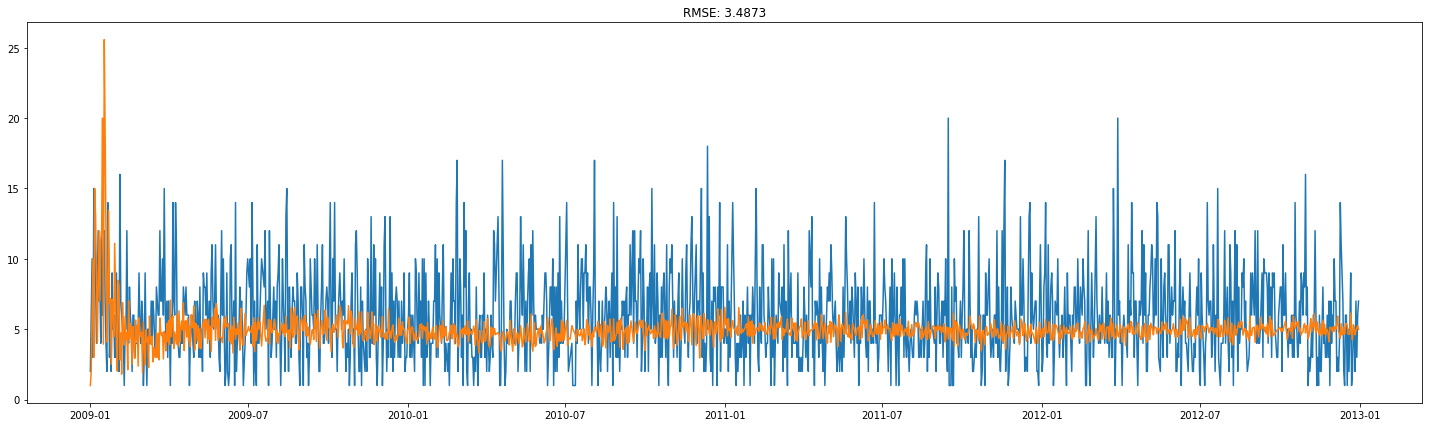

In [57]:
predictions_SARIMAX1 = np.exp(predictions_SARIMAX)
fig=plt.figure(figsize=(25,7))
plt.plot(ts)
plt.plot(predictions_SARIMAX1)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_SARIMAX1-ts.iloc[:,0])**2)/len(ts)))

## Prediction
The model is then used to predict the future data. I have taken 1 year worth of available data and used it to forecast trend for dates after that. RMSE is used to measure the accuracy of prediction

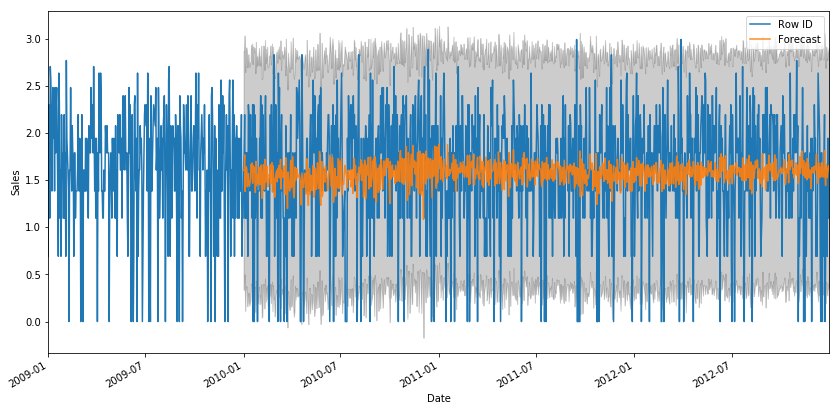

RMSE: 0.5524


In [58]:
pred = results.get_prediction(357)
pred_ci = pred.conf_int()
ax = ts_log['2009':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.9, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()
print('RMSE: %.4f'% np.sqrt(sum((pred.predicted_mean-ts_log.iloc[357:,0])**2)/len(ts)))

## Model 2 - Recommender System for products

Building a recommender system using item-item similarity to help the shop recommend products to new users. Since there is no user data available therefore user-user similarity measure is difficult to get here. Therefore final approach is item-item similarity. The similarity measure is number of purchases made for a product

In [6]:
recdata=data.groupby(['Customer Name','Product Name'],as_index=False)[['Order Quantity']].sum()
recdata.head()

Customer Name                                    Product Name  \
0  Aaron Bergman        Acme? Preferred Stainless Steel Scissors   
1  Aaron Bergman                                        Avery 49   
2  Aaron Bergman                 Canon S750 Color Inkjet Printer   
3  Aaron Bergman  SANFORD Liquid Accent? Tank-Style Highlighters   
4  Aaron Bergman                                             V70   

   Order Quantity  
0              23  
1               5  
2              35  
3              13  
4              26

In [79]:
recdata.dtypes

Customer Name     object
Product Name      object
Order Quantity     int64
dtype: object

In [7]:
recdata['Customer Name']=recdata['Customer Name'].astype('category')
recdata['Product Name']=recdata['Product Name'].astype('category')
recdata.dtypes

Customer Name     category
Product Name      category
Order Quantity       int64
dtype: object

In [8]:
from sklearn import preprocessing

#Label encoding Customer name
le = preprocessing.LabelEncoder()
le.fit(recdata['Customer Name'].unique())
x=le.transform(recdata['Customer Name'])
recdata['customerId']=x

#Label encoding product name
le1 = preprocessing.LabelEncoder()
le1.fit(recdata['Product Name'].unique())
y=le1.transform(recdata['Product Name'])
recdata['productId']=y

recdata.head()

Customer Name                                    Product Name  \
0  Aaron Bergman        Acme? Preferred Stainless Steel Scissors   
1  Aaron Bergman                                        Avery 49   
2  Aaron Bergman                 Canon S750 Color Inkjet Printer   
3  Aaron Bergman  SANFORD Liquid Accent? Tank-Style Highlighters   
4  Aaron Bergman                                             V70   

   Order Quantity  customerId  productId  
0              23           0        133  
1               5           0        182  
2              35           0        324  
3              13           0        904  
4              26           0       1075

In [9]:
recdata1=recdata[['customerId','productId','Order Quantity']]
recdata1.head()

customerId  productId  Order Quantity
0           0        133              23
1           0        182               5
2           0        324              35
3           0        904              13
4           0       1075              26

In [36]:
#Constructing a matrix of product and customers
df_matrix = pd.pivot_table(recdata1, values='Order Quantity', index='productId', columns='customerId')
df_matrix.head()

customerId  0    1    2    3    4    5    6    7    8    9    ...   785   786  \
productId                                                     ...               
0           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
1           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN  23.0   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  86.0   NaN   

customerId  787   788  789  790  791  792  793  794  
productId                                            
0           NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1           NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2           NaN  41.0  NaN  NaN  NaN  NaN  NaN  NaN  
3           NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4           NaN   NaN  NaN  NaN  NaN  7.0  NaN  NaN  

[5 rows x 795 columns]

In [121]:
#Normalizing the sales numbers
df_matrix_norm = (df_matrix-df_matrix.min())/(df_matrix.max()-df_matrix.min())
df_matrix_norm=df_matrix_norm.fillna(0)
df_matrix_norm.head()

customerId  0    1    2    3    4    5    6    7    8    9    ...  785  \
productId                                                     ...        
0           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
4           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0   

customerId       786  787       788  789  790  791  792  793  794  
productId                                                          
0           0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
1           0.341463  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
2           0.000000  0.0  0.888889  0.0  0.0  0.0  0.0  0.0  0.0  
3           0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
4           0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 795 columns]

In [50]:
#Creating a function to get recommendations
def get_recommendations(Item, cosine_sim=cosine_sim):
    # Get the pairwsie similarity scores of all items with that items
    sim_scores = list(enumerate(cosine_sim[Item]))
    # Sort the items based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 10 most similar items
    sim_scores = sim_scores[1:11]
    # Get the item indices
    item_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar items
    return recdata1['productId'].iloc[item_indices]

## Prediction

In [112]:
#Final recommendation

#Variable to specify the product for which recommendation is needed
prod='Acme? Preferred Stainless Steel Scissors'

products=recdata['Product Name'].unique()
prod_lookup=pd.DataFrame(zip(y,products))
product=prod_lookup.loc[prod_lookup[1] == prod,:0]
rec=pd.DataFrame(get_recommendations(int(product[0])))
# list(rec.iloc[:,0])
pd.DataFrame(le1.inverse_transform(list(rec.iloc[:,0])))

C:\Users\archo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



0
0  Barricks 18" x 48" Non-Folding Utility Table w...
1                       Vinyl Sectional Post Binders
2                                          Avery 520
3                                          Xerox 213
4                                         Xerox 1880
5    Staples Wirebound Steno Books, 6" x 9", 12/Pack
6  Hon 4070 Series Pagoda? Armless Upholstered St...
7     SANFORD Liquid Accent? Tank-Style Highlighters
8           GBC DocuBind P100 Manual Binding Machine
9                                        Accessory39

Top 10 recommendations are suggested for the product. These products can be advertised to people who have bought the product specified for prod variable